# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract the columns for the different data elements
2. Visualize the distributions for the report 


<br>

| Table Name |variable prefix|columns |DType |Description | 
| :--- | :--- | :--- | :--- | :--- |
| Research Session Attendance|rsa_|25 |Binary|Records attendence for each week of treatment | 
| Demographics|dem_|10 |Categorical|Sex, Ethnicity, Race | 
| Urine Drug Screen| test_|225|Binary  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|dsm_|6|Categorical |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|mdh_|18|Categorical |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|pex_|12|Categorical |Tracks the appearance and condition of patients for 12 different physical observations| 
| Timeline Follow Back Survey|survey_|70|Numeric |Surveys for self reported drug use, collected every 4 weeks, records total number of instances of drug use for the previous 30 days|
| Dose Record |meds_|50|Numeric |Records the medication, averge weekly dose and week of treatment| 


### Import Required Libraries

In [16]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/48_features.csv')

# Display the first few rows of the data
print('Data shape:', data.shape)
display(data)

Data shape: (1269, 48)


,test_oxycodone_0,test_cocaine_0,test_methamphetamine_0,test_opiate300_0,test_oxycodone_1,test_cocaine_1,test_methamphetamine_1,test_opiate300_1,test_oxycodone_2,test_cocaine_2,...,cows_predose,cows_postdose,gender,pex_respiratory,pex_gi_system,pex_gen_appearance,pex_ears_nose_throat,pex_cardio,pex_skin,dropout
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,6,1.0,normal,abnormal,normal,normal,normal,normal,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,8,1,0.0,normal,abnormal,abnormal,abnormal,normal,abnormal,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,8,5,1.0,normal,normal,normal,normal,normal,abnormal,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,11,9,0.0,normal,normal,normal,normal,normal,normal,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,11,6,0.0,normal,abnormal,abnormal,abnormal,normal,abnormal,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,11,8,0.0,normal,normal,normal,normal,normal,normal,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,26,10,1.0,normal,normal,normal,normal,normal,normal,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,14,6,0.0,normal,normal,normal,normal,normal,normal,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,12,5,0.0,not_evaluated,not_evaluated,not_evaluated,not_evaluated,not_evaluated,not_evaluated,1.0


In [17]:
data.columns.tolist()

['test_oxycodone_0',
 'test_cocaine_0',
 'test_methamphetamine_0',
 'test_opiate300_0',
 'test_oxycodone_1',
 'test_cocaine_1',
 'test_methamphetamine_1',
 'test_opiate300_1',
 'test_oxycodone_2',
 'test_cocaine_2',
 'test_methamphetamine_2',
 'test_opiate300_2',
 'test_oxycodone_3',
 'test_cocaine_3',
 'test_methamphetamine_3',
 'test_opiate300_3',
 'test_oxycodone_4',
 'test_cocaine_4',
 'test_methamphetamine_4',
 'test_opiate300_4',
 'survey_cocaine_0',
 'survey_oxycodone_0',
 'survey_methamphetamine_0',
 'survey_opiates_0',
 'survey_cocaine_4',
 'survey_oxycodone_4',
 'survey_methamphetamine_4',
 'survey_opiates_4',
 'meds_methadone_0',
 'meds_buprenorphine_0',
 'meds_methadone_1',
 'meds_buprenorphine_1',
 'meds_methadone_2',
 'meds_buprenorphine_2',
 'meds_methadone_3',
 'meds_buprenorphine_3',
 'meds_methadone_4',
 'meds_buprenorphine_4',
 'cows_predose',
 'cows_postdose',
 'gender',
 'pex_respiratory',
 'pex_gi_system',
 'pex_gen_appearance',
 'pex_ears_nose_throat',
 'pex_card

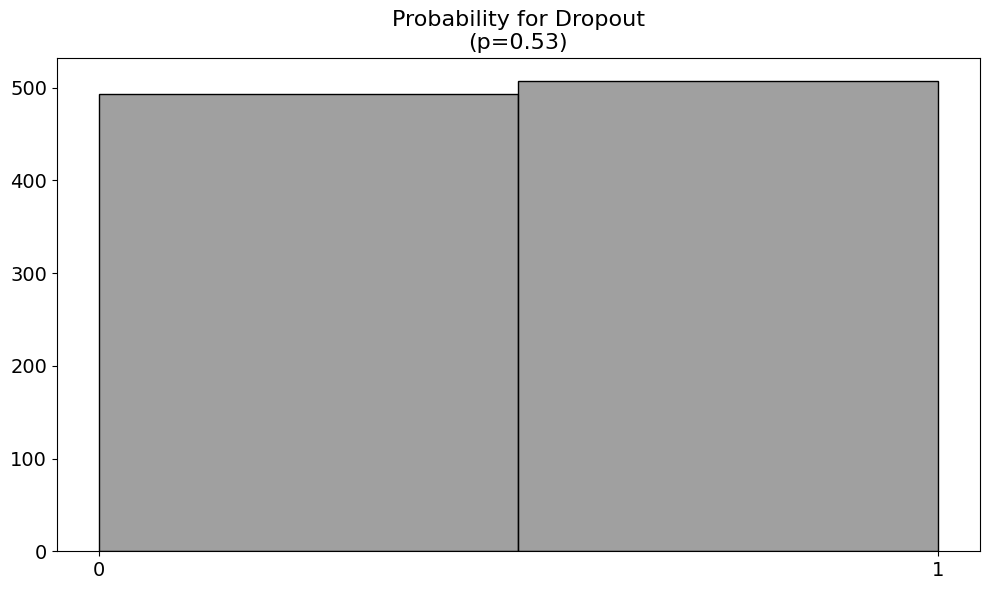

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the probability of dropout
p_dropout = data['dropout'].mean()

# Generate Bernoulli distributed data based on this probability
data_dropout = np.random.binomial(1, p_dropout, 1000)

# Create a histogram plot for the `dropout` column
plt.figure(figsize=(10, 6))
sns.histplot(data_dropout, kde=False, bins=2, color='gray')
plt.title(f'Probability for Dropout\n(p={p_dropout:.2f})', fontsize=16)
plt.xticks([0, 1], ['0', '1'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('')  # Remove y-axis label
plt.gca().yaxis.set_label_text('')  # Remove the word "Frequency" from y-axis

# Display the plot
plt.tight_layout()
plt.show()

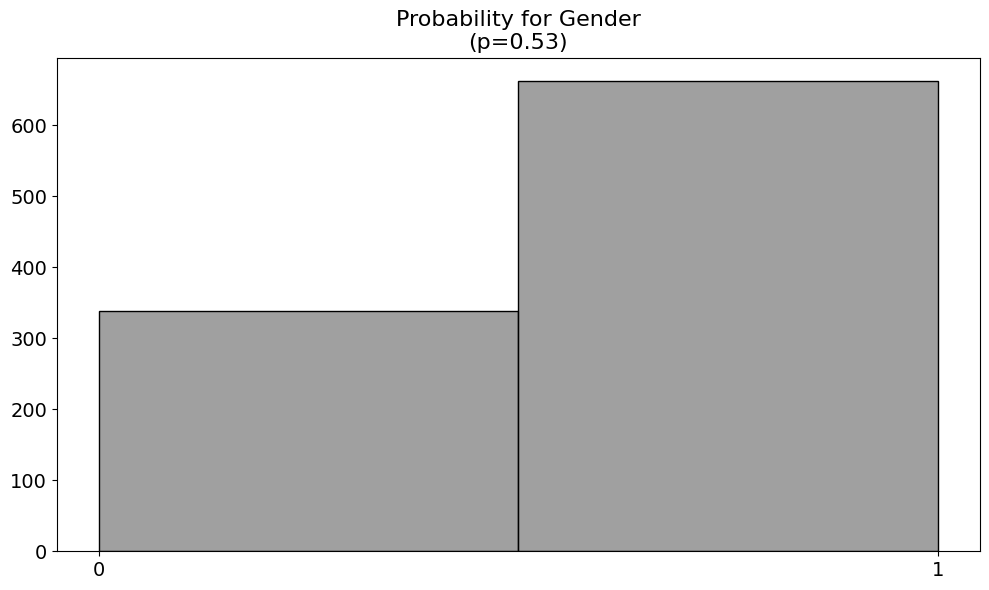

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the probability of dropout
p_gender = data['gender'].mean()

# Generate Bernoulli distributed data based on this probability
data_gender = np.random.binomial(1, p_gender, 1000)

# Create a histogram plot for the `dropout` column
plt.figure(figsize=(10, 6))
sns.histplot(data_gender, kde=False, bins=2, color='gray')
plt.title(f'Probability for Gender\n(p={p_dropout:.2f})', fontsize=16)
plt.xticks([0, 1], ['0', '1'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('')  # Remove y-axis label
plt.gca().yaxis.set_label_text('')  # Remove the word "Frequency" from y-axis

# Display the plot
plt.tight_layout()
plt.show()

## Create Dual Bar Plot for Medication Dose Table

In [20]:
# subset methadone patients
meds_m = data[[col for col in data.columns if 'meds_m' in col]].iloc[:, 1:5]
# remove rows with all 0
meds_m = meds_m[meds_m.sum(axis=1) != 0]

# subset buprenorphine patients
meds_b = data[[col for col in data.columns if 'meds_b' in col]].iloc[:, 1:5]
# remove rows with all 0
meds_b = meds_b[meds_b.sum(axis=1) != 0]

In [41]:
meds_b.describe()

,meds_buprenorphine_1,meds_buprenorphine_2,meds_buprenorphine_3,meds_buprenorphine_4
count,652.000000,652.000000,652.000000,652.000000
mean,16.090491,16.516871,14.679448,15.883436
std,9.470438,11.059177,11.028382,13.647028
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,8.000000,5.000000,5.000000
50%,15.500000,16.000000,14.500000,16.000000
75%,22.000000,24.000000,23.000000,24.000000
max,64.000000,58.000000,48.000000,126.000000


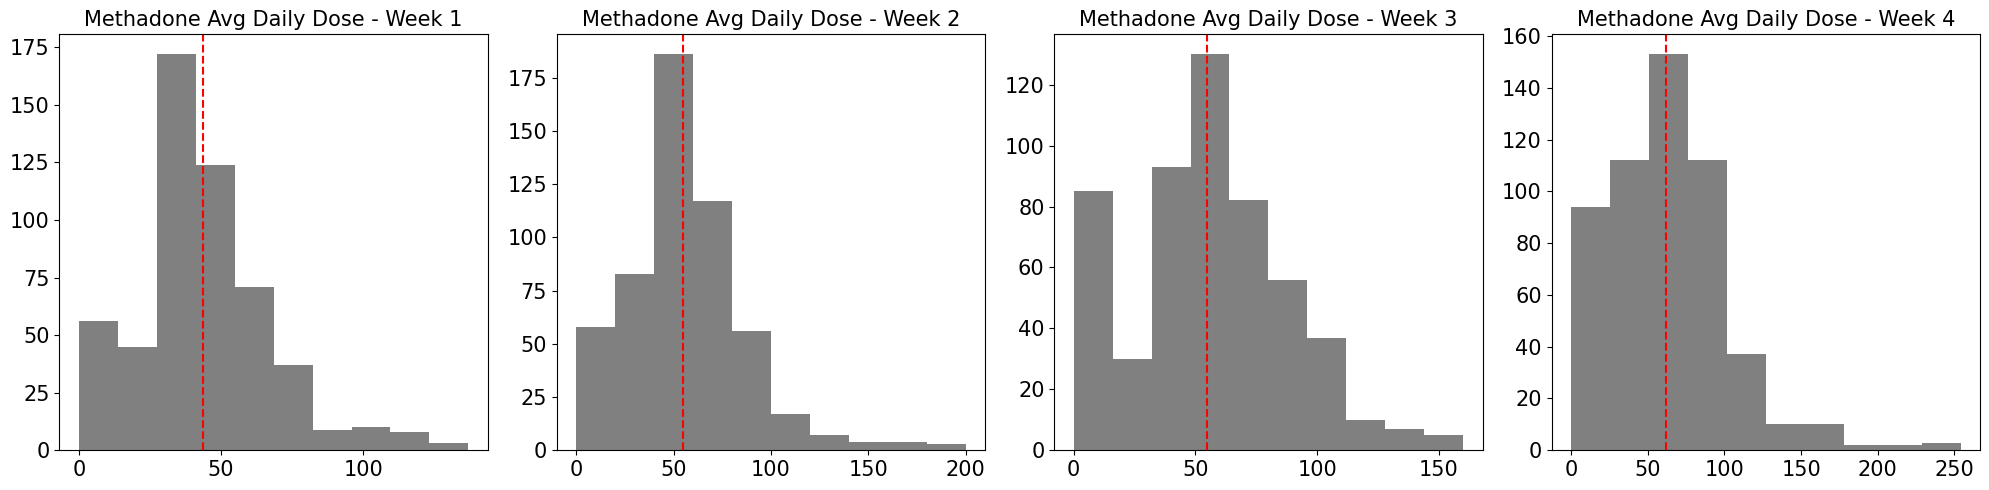

In [21]:
import matplotlib.pyplot as plt

# Assuming meds_m is a DataFrame with at least 4 columns
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # Create a figure with 4 subplots in 1 row

# Titles for each subplot
titles = ['Methadone Avg Daily Dose - Week 1', 'Methadone Avg Daily Dose - Week 2', 'Methadone Avg Daily Dose - Week 3', 'Methadone Avg Daily Dose - Week 4']

# Plot histograms for the first 4 columns of meds_m
for i, column in enumerate(meds_m.columns[:4]):
    meds_m[column].hist(ax=ax[i], color='gray', bins=10)
    # add axviline for the mean
    ax[i].axvline(meds_m[column].mean(), color='red', linestyle='--')
    ax[i].set_title(titles[i], fontsize=15)  # Set the title to the corresponding week with larger font size
    ax[i].tick_params(axis='both', which='major', labelsize=15)  # Set tick parameters with larger font size
    ax[i].grid(False)  # Remove the background grid

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

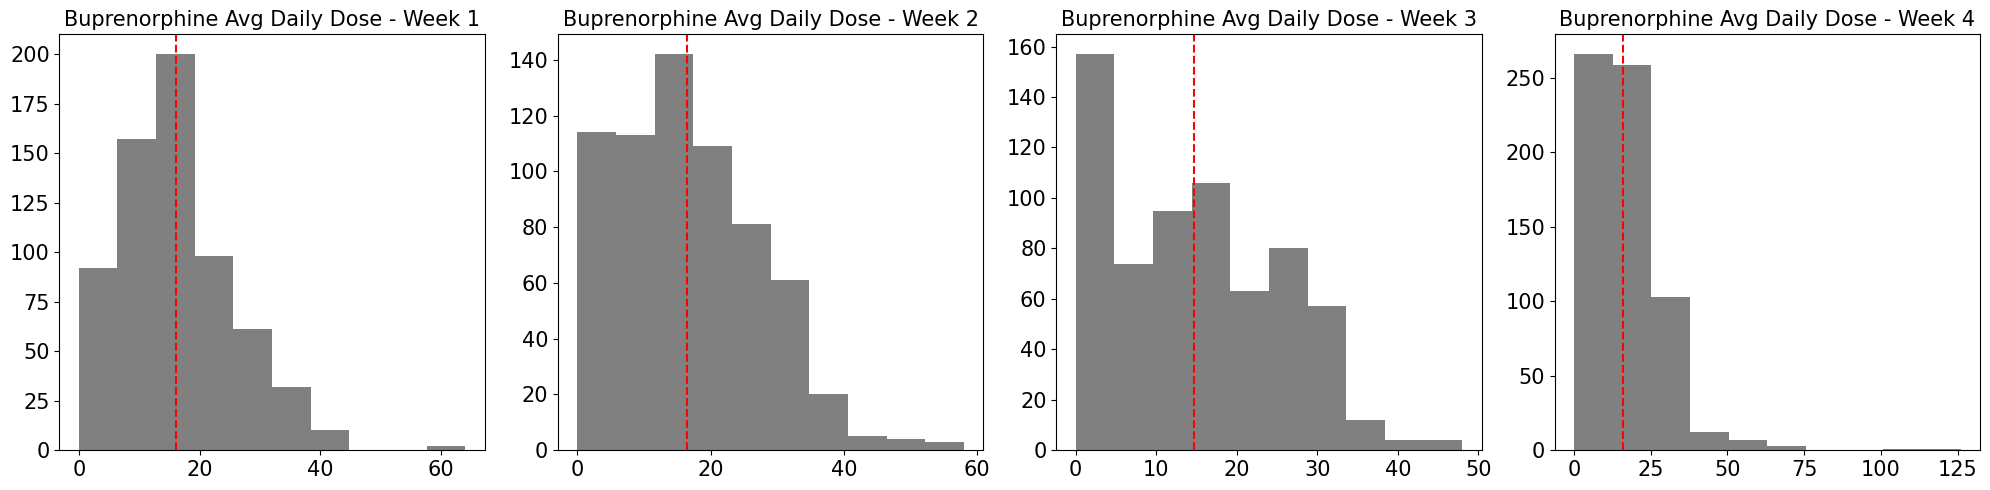

In [22]:
# Assuming meds_m is a DataFrame with at least 4 columns
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # Create a figure with 4 subplots in 1 row

# Titles for each subplot
titles = ['Buprenorphine Avg Daily Dose - Week 1', 'Buprenorphine Avg Daily Dose - Week 2', 'Buprenorphine Avg Daily Dose - Week 3', 'Buprenorphine Avg Daily Dose - Week 4']

# Plot histograms for the first 4 columns of meds_m
for i, column in enumerate(meds_b.columns[:4]):
    meds_b[column].hist(ax=ax[i], color='gray', bins=10)
    # add axviline for the mean
    ax[i].axvline(meds_b[column].mean(), color='red', linestyle='--')
    ax[i].set_title(titles[i], fontsize=15)  # Set the title to the corresponding week with larger font size
    ax[i].tick_params(axis='both', which='major', labelsize=15)  # Set tick parameters with larger font size
    ax[i].grid(False)  # Remove the background grid

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [23]:
tests = data[[col for col in data.columns if 'test' in col]]

tests

,test_oxycodone_0,test_cocaine_0,test_methamphetamine_0,test_opiate300_0,test_oxycodone_1,test_cocaine_1,test_methamphetamine_1,test_opiate300_1,test_oxycodone_2,test_cocaine_2,test_methamphetamine_2,test_opiate300_2,test_oxycodone_3,test_cocaine_3,test_methamphetamine_3,test_opiate300_3,test_oxycodone_4,test_cocaine_4,test_methamphetamine_4,test_opiate300_4
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
# plot drug test counts for first 4 weeks of treatment

# create df with count of all drug tests
drugs = ['oxycodone', 'cocaine', 'methamphetamine', 'opiate300']

# Create a df for each drug class with the corresponding columns
for drug in drugs:
    globals()[drug] = tests[[col for col in tests.columns if drug in col]]
    # Remove column names, leaving suffix for week of treatment
    globals()[drug].columns = [re.sub('.*?_', '', col) for col in globals()[drug].columns]
    # Apply sum aggregation to columns
    globals()[drug] = globals()[drug].sum(axis=0).to_frame(f'{drug}').reset_index(drop=True)

# Merge all drug classes into a single df
drug_tests = pd.concat([oxycodone, cocaine, methamphetamine, opiate300], axis=1).reset_index(drop=True)

drug_tests

,oxycodone,cocaine,methamphetamine,opiate300
0,182.0,474.0,111.0,1107.0
1,257.0,573.0,292.0,752.0
2,323.0,608.0,341.0,721.0
3,377.0,653.0,409.0,727.0
4,343.0,618.0,371.0,690.0


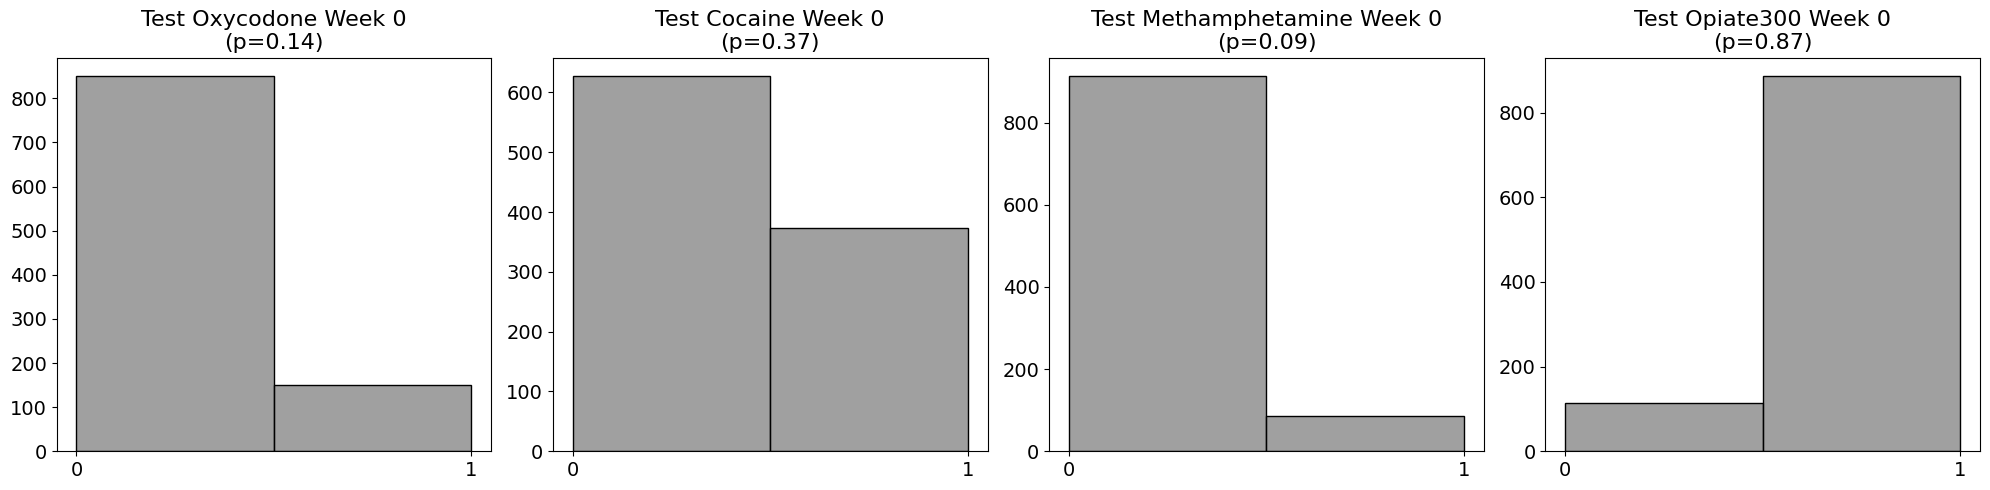

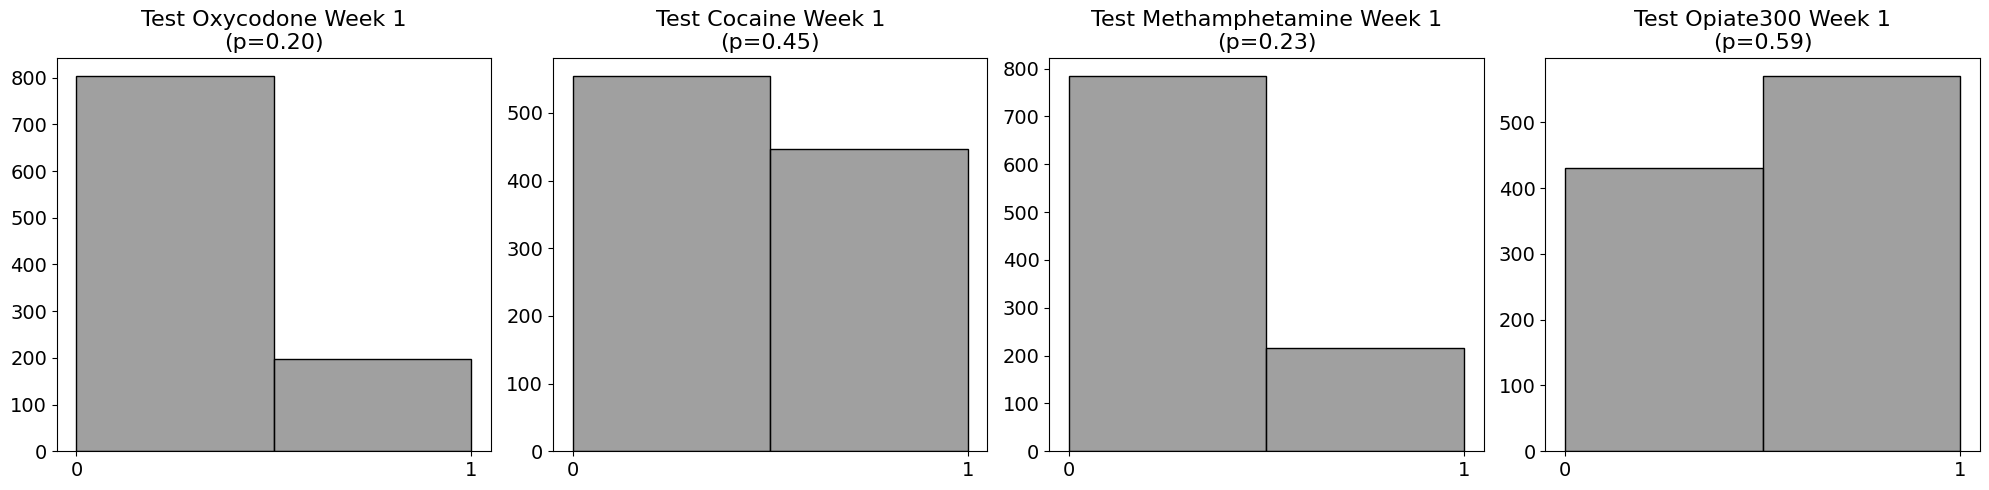

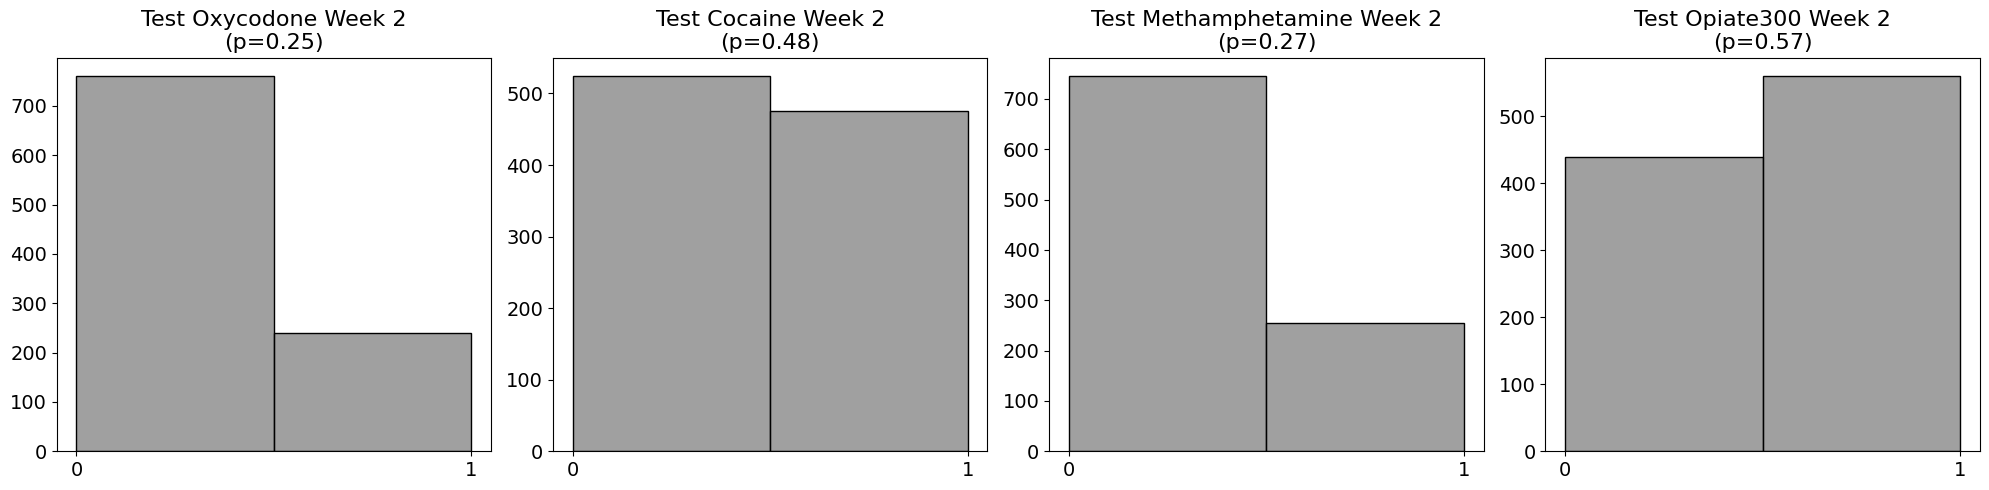

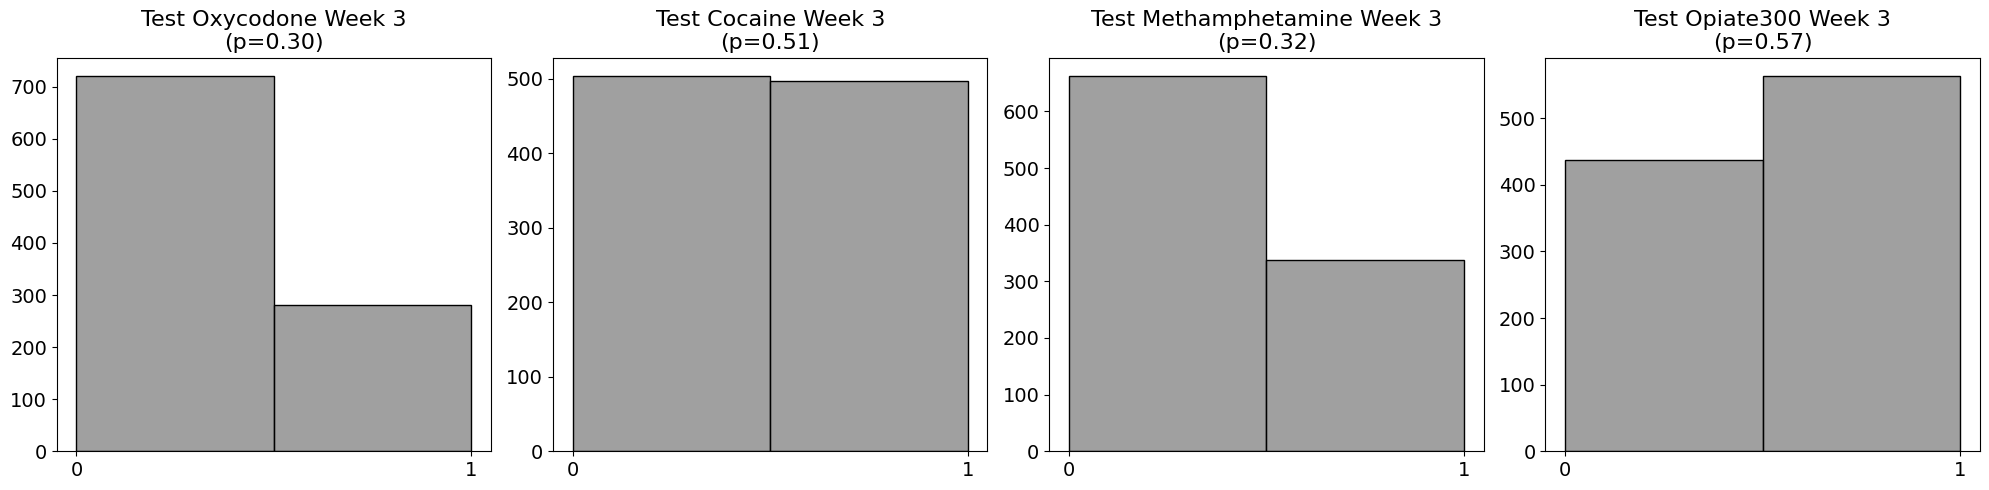

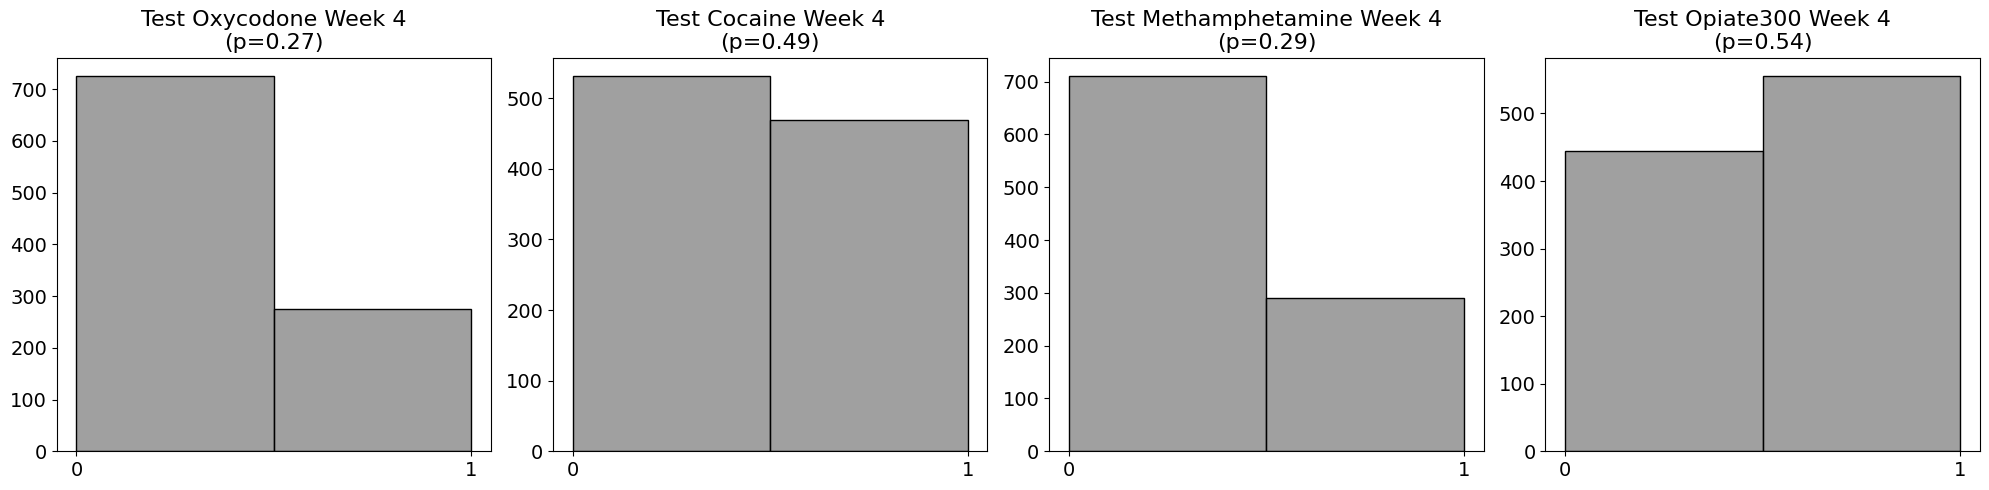

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the mean (probability p) for each column in the tests DataFrame
probabilities = tests.mean()

# Number of columns per plot
num_cols = 4

# Split the columns into chunks of 4
chunks = [tests.columns[i:i + num_cols] for i in range(0, len(tests.columns), num_cols)]

# Function to format the title
def format_title(title):
    parts = title.split('_')
    formatted_title = ' '.join(part.capitalize() for part in parts[:-1])
    formatted_title += f' Week {parts[-1]}'
    return formatted_title

# Loop through each chunk and create a separate plot
for chunk in chunks:
    # Create a figure with subplots (1 row and 4 columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Loop through each column in the chunk and create a plot in the corresponding subplot
    for i, col in enumerate(chunk):
        p = probabilities[col]
        distribution = np.random.binomial(1, p, 1000)  # Generate Bernoulli distributed data
        
        sns.histplot(distribution, kde=False, bins=2, ax=axes[i], color='gray')
        formatted_title = format_title(col)
        axes[i].set_title(f'{formatted_title}\n(p={p:.2f})', fontsize=16)
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['0', '1'], fontsize=14)
        axes[i].set_yticklabels([int(y) for y in axes[i].get_yticks()], fontsize=14)
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].yaxis.set_label_text('')  # Remove the word "Frequency" from y-axis
    
    # Remove any unused subplots
    for j in range(len(chunk), num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [26]:
surveys = data[[col for col in data.columns if 'survey' in col]]

surveys

,survey_cocaine_0,survey_oxycodone_0,survey_methamphetamine_0,survey_opiates_0,survey_cocaine_4,survey_oxycodone_4,survey_methamphetamine_4,survey_opiates_4
0,0.0,0.0,0.0,30.0,0.0,0.0,2.0,0.0
1,0.0,0.0,0.0,30.0,0.0,0.0,0.0,5.0
2,23.0,0.0,0.0,30.0,9.0,0.0,0.0,9.0
3,2.0,1.0,0.0,30.0,1.0,0.0,0.0,6.0
4,0.0,25.0,0.0,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1264,2.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0
1265,11.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0
1266,0.0,8.0,0.0,20.0,0.0,0.0,0.0,0.0
1267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


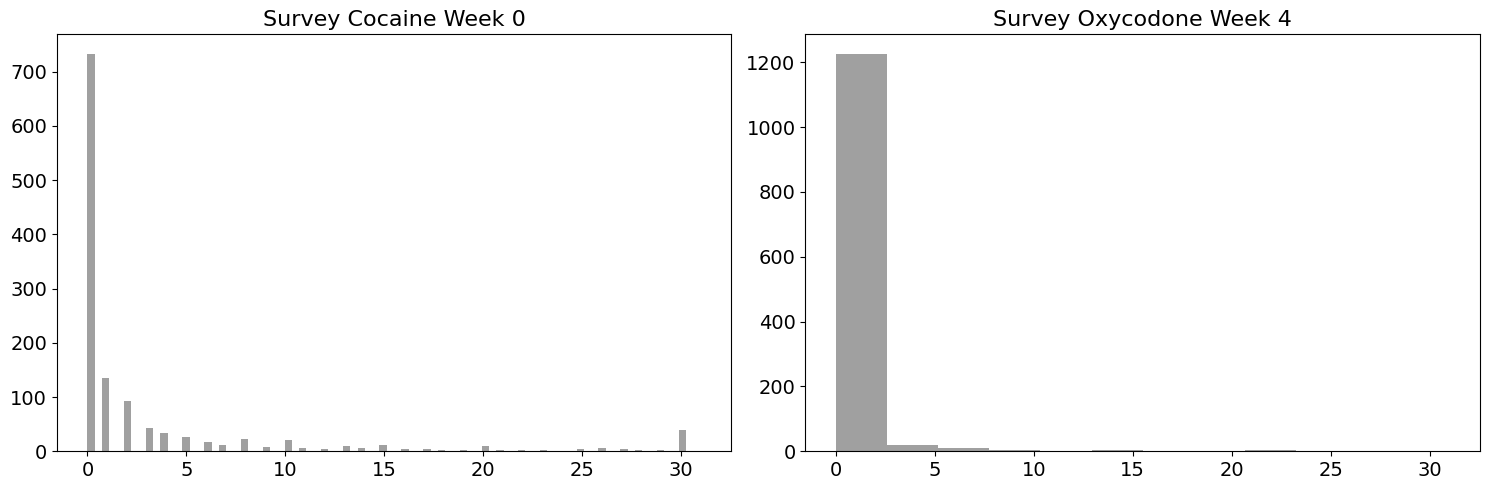

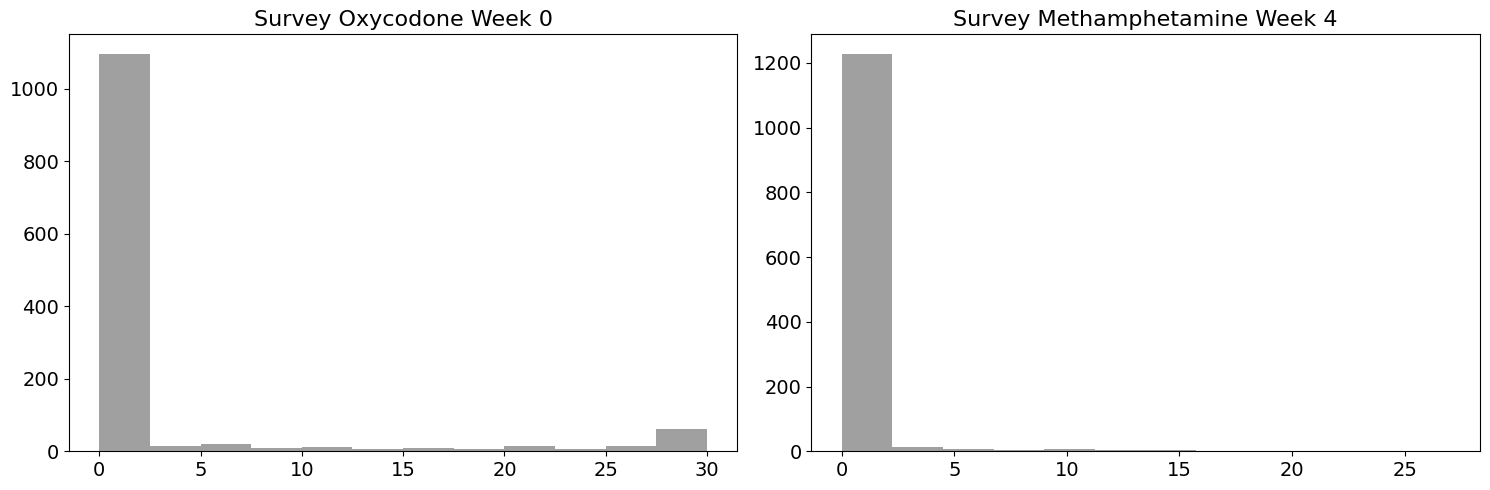

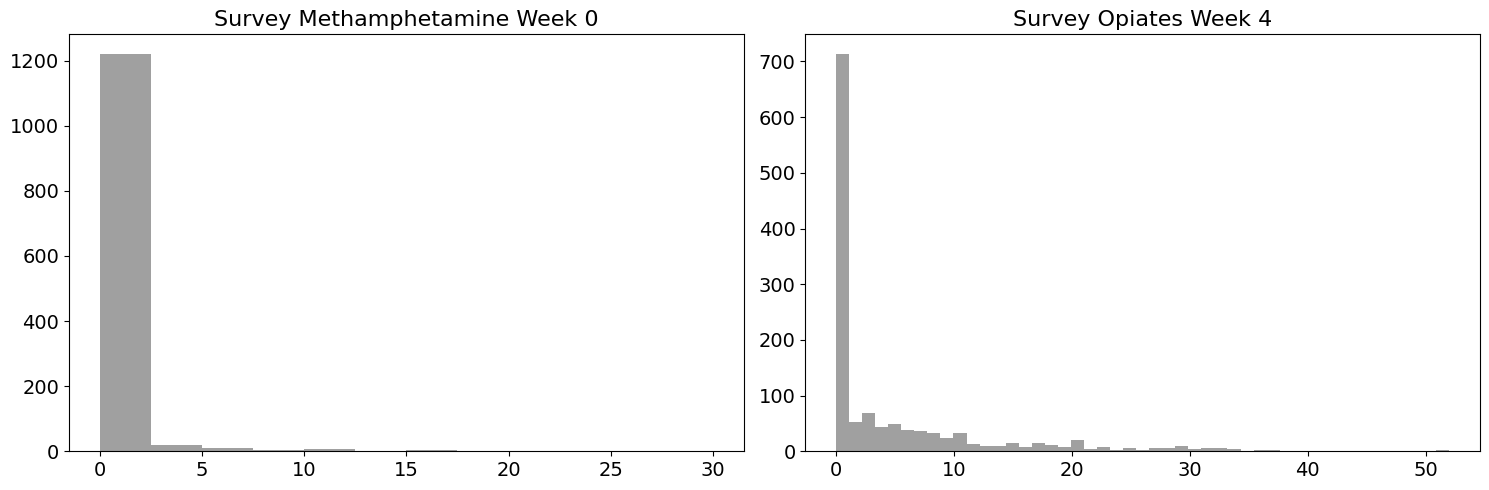

IndexError: index 8 is out of bounds for axis 0 with size 8

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


# Function to format column names
def format_column_name(col):
    # Remove underscores and capitalize the first words
    col = col.replace('_', ' ').title()
    # Add the word 'week' before the number at the end
    col = re.sub(r'(\d+)$', r'Week \1', col)
    return col

# Function to plot histograms for a given set of columns in a 2-column layout
def plot_histograms(columns):
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(surveys[col], kde=False, ax=axes[i], color='gray', edgecolor=None)
        formatted_col = format_column_name(col)
        axes[i].set_title(formatted_col, fontsize=16)
        axes[i].tick_params(axis='x', labelsize=14)
        axes[i].tick_params(axis='y', labelsize=14)
        axes[i].set_xlabel('')  # Remove x-axis label
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].yaxis.set_label_text('')  # Remove the word "Frequency" from y-axis
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Create pairs of columns in the specified order, ensuring they are within bounds
pairs = [(0, 5), (1, 6), (2, 7), (3, 8), (4, 9)]
if len(surveys.columns) > 10:
    pairs.append((5, 10))

# Iterate through the pairs and plot histograms for each pair
for pair in pairs:
    columns = [surveys.columns[pair[0]], surveys.columns[pair[1]]]
    plot_histograms(columns)

In [29]:
pex = data[[col for col in data.columns if 'pex' in col]]

# remove index 1211
pex = pex.drop(1211)

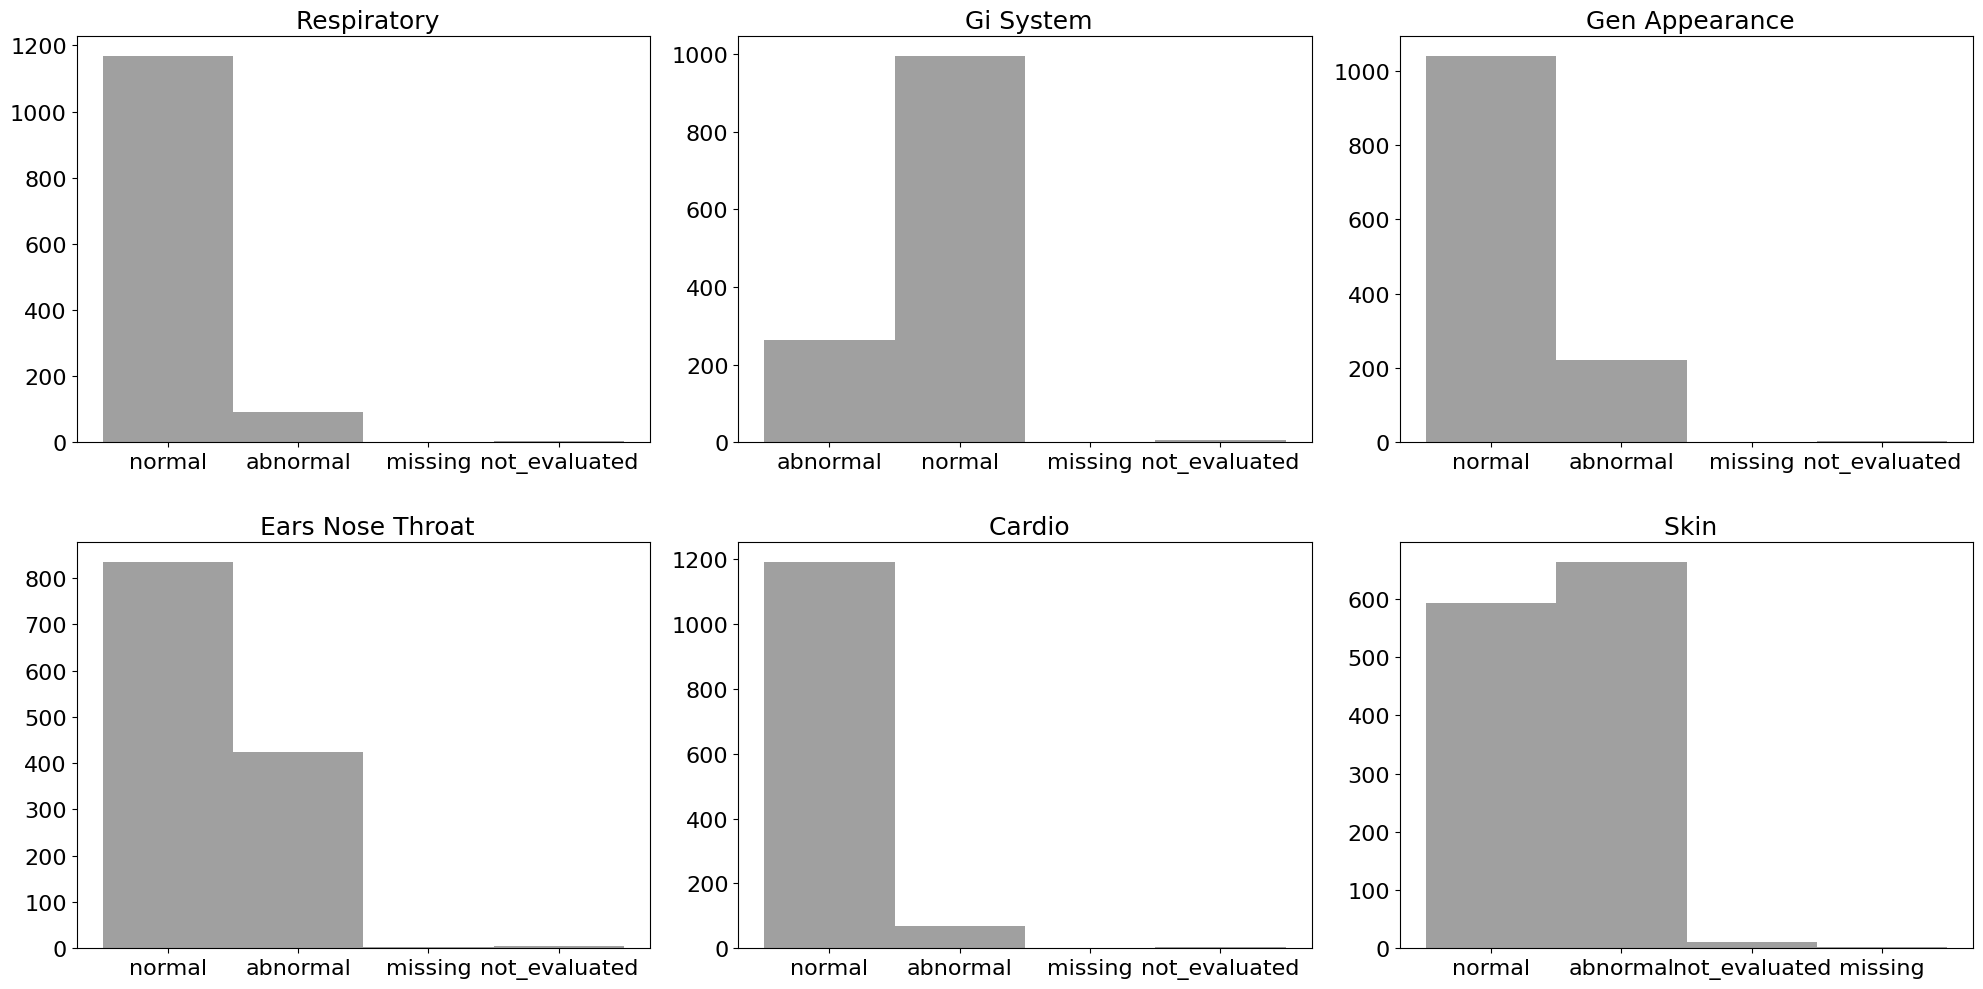

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distributions for columns in the pex DataFrame
def plot_distributions(df):
    # Remove rows where all values are zero
    
    
    # Rename columns
    renamed_columns = {col: col.replace('pex', '').replace('_', ' ').title() for col in df.columns}
    df = df.rename(columns=renamed_columns)
    
    num_cols = len(df.columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], kde=False, ax=axes[i], color='gray', edgecolor=None)
        axes[i].set_title(col, fontsize=18)  # Increase title font size
        axes[i].tick_params(axis='x', labelsize=16)  # Increase x-axis tick label size
        axes[i].tick_params(axis='y', labelsize=16)  # Increase y-axis tick label size
        axes[i].set_xlabel('')  # Remove x-axis label
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].yaxis.set_label_text('')  # Remove the word "Frequency" from y-axis
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(h_pad=3.0)  # Add horizontal padding between rows
    plt.show()

# Plot distributions for columns in the pex DataFrame
plot_distributions(pex)

In [31]:
cows = data[[col for col in data.columns if 'cows' in col]]

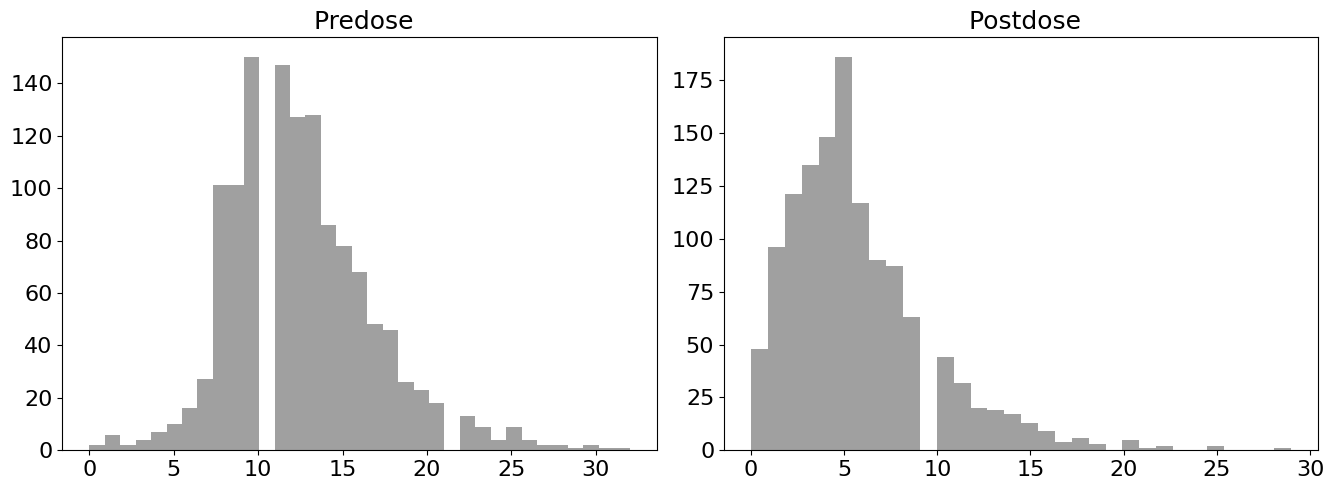

In [32]:
# plot the distribution of cows scores for each week of treatment
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distributions for columns in the cows DataFrame
def plot_distributions(df):
    # Rename columns
    renamed_columns = {col: col.replace('cows', '').replace('_', ' ').title() for col in df.columns}
    df = df.rename(columns=renamed_columns)
    
    num_cols = len(df.columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], kde=False, ax=axes[i], color='gray', edgecolor=None)
        axes[i].set_title(col, fontsize=18)  # Increase title font size
        axes[i].tick_params(axis='x', labelsize=16)  # Increase x-axis tick label size
        axes[i].tick_params(axis='y', labelsize=16)  # Increase y-axis tick label size
        axes[i].set_xlabel('')  # Remove x-axis label
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].yaxis.set_label_text('')  # Remove the word "Frequency" from y-axis
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(h_pad=3.0)  # Add horizontal padding between rows
    plt.show()

# Plot distributions for columns in the cows DataFrame
plot_distributions(cows)

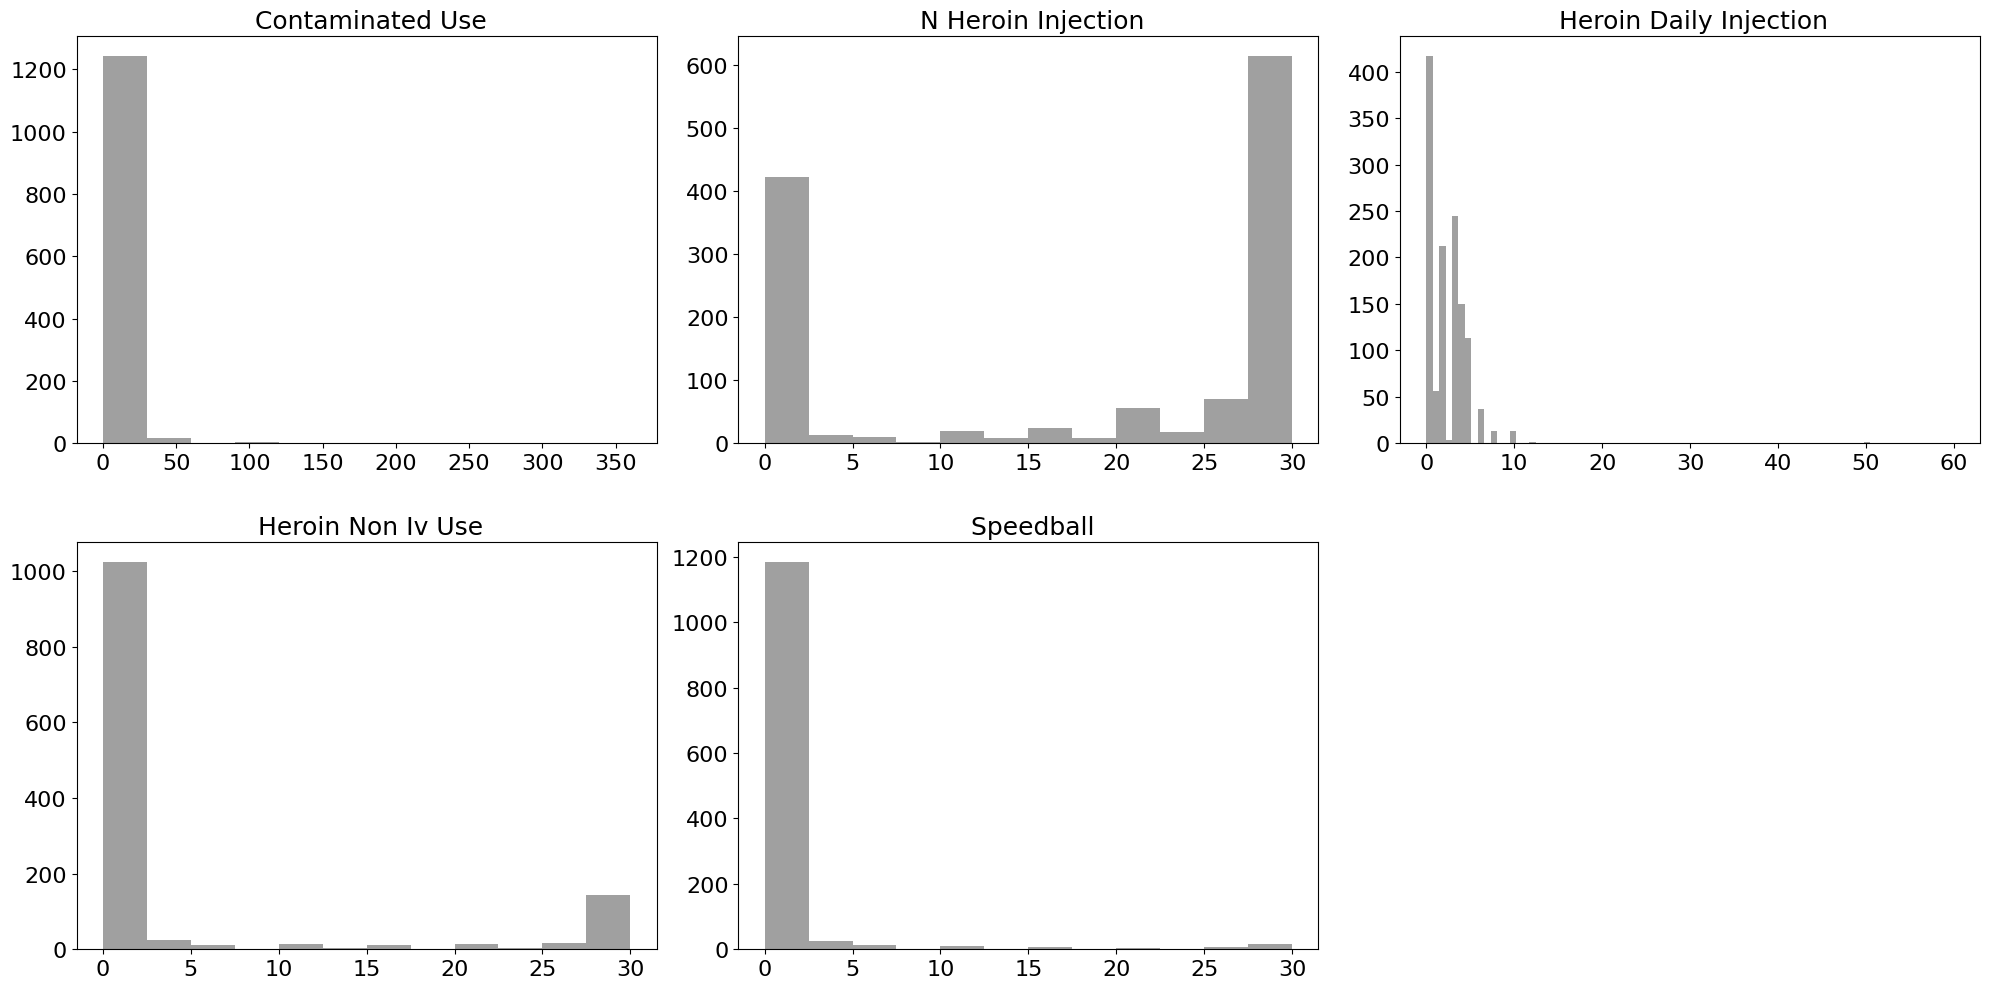

In [19]:
rbs = data[[col for col in data.columns if 'rbs' in col]]

# plot the distribution of rbs scores for each week of treatment
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distributions for columns in the rbs DataFrame
def plot_distributions(df):
    # Rename columns
    renamed_columns = {col: col.replace('rbs', '').replace('_', ' ').title() for col in df.columns}
    df = df.rename(columns=renamed_columns)
    
    num_cols = len(df.columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], kde=False, ax=axes[i], color='gray', edgecolor=None)
        axes[i].set_title(col, fontsize=18)  # Increase title font size
        axes[i].tick_params(axis='x', labelsize=16)  # Increase x-axis tick label size
        axes[i].tick_params(axis='y', labelsize=16)  # Increase y-axis tick label size
        axes[i].set_xlabel('')  # Remove x-axis label
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].yaxis.set_label_text('')  # Remove the word "Frequency" from y-axis
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(h_pad=3.0)  # Add horizontal padding between rows
    plt.show()

# Plot distributions for columns in the rbs DataFrame
plot_distributions(rbs)

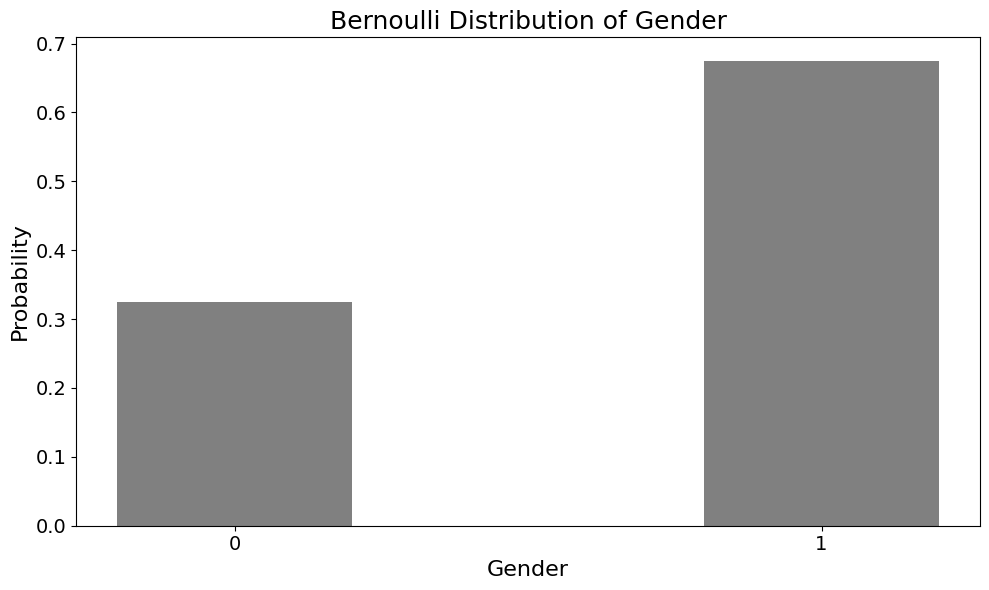

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli

# Assuming dem is already defined as a DataFrame with a 'gender' column
# Extract the binary data
binary_data = dem['gender']

# Calculate the probability of success (p)
p = binary_data.mean()

# Generate the Bernoulli distribution
x = [0, 1]
pmf = bernoulli.pmf(x, p)

# Plot the Bernoulli distribution
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='gray', width=0.4)

# Set title and labels with larger fonts
plt.title('Bernoulli Distribution of Gender', fontsize=18)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.xticks([0, 1], ['0', '1'], fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()